In [1]:
from qutip import *
import numpy as np
import random
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
import matplotlib.transforms as transforms
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
nb = True
%matplotlib inline

# Final Project TN3155: Destroying interference by measuring 'which path' information for diffraction grating

## 1. Introduction
The double-slit experiment is a demonstration that light and matter can display characteristics of both classically defined waves and particles. First performed in 1801 by Thomas Young, it stands as a demonstration of the wave-like behaviour of light (until then believed to be either waves or particles). The double-slit experiment is based on observing the interference of the light waves of two coherent sources travelling different distances, which generate minima and maxima on an observer screen. In practice, this is done by illuminating two slits with a punctiform source of light, such that the two will become, according to Huygens-Fresnel principle, sources of coherent light themselves. Placing a screen far enough from these two newly created sources of light, one can observe their interference.

Amazingly, the pattern of light and dark spots that can be seen on the observer screen appear to follow the pattern of a cosinus function, i.e. the Fourier transform of the two $\delta$ functions represented by the two sources. Therefore, one can regard this experiment as a one-dimensional Fourier-transform, where the $x$-axis, for all practical purposes, can be regarded as registering the evolution happening to the system in time.

These observations rose interest for further development of the experiment. Diffraction grating is a generalization of the 2-slit experiment, in the sense that it can be realized using an arbitrarily high number of slits. Surprisingly or not, the observations that were made for the double slit experiment were held valid in this generalization also: the pattern seen on the screen can be described as the Fourier transform of an arbitrily high number of $\delta$ functions. 

The next step in this experiment's becoming was observing its intrinsic mechanism itself, i.e. observing the path that a single photons take, when going through any of the slits. However, this mere observation seems to throw off the experiment. Measuring, at just one of the slits, the position of photons, destroys the interference pattern completely. The light, in this scenario, loses all of its wave-light properties, and exhibits its particle-like behaviour.

This paper aims to render this scenario and observe this problem. The following sections are set up as follows: section 2 will provide a theoretical background of diffraction grating and the two-slit experiment, proving, mathematically, the shape of the light pattern on the wall. This section will also include a more detailed description of the "which path" problem. Section 3 will introduce the reader to the specific aspects of the "which path" problem that we set out to approach, and, section 4, to the techniques and approach that are used. The last 2 sections will sum up our experiment, by formulating the Results and Conclusions, repsectively.




## 2. Theoretical foundation of the problem

This section comes to address the prior knowledge needed in order to follow the rest of the paper, namely familiarization with Young's experiment and diffraction grating. All the calculations performed throughout the section obey Gaussian approximations (in particular, the small angle approximation).



### 2.1 Theoretical considerations in the double slit experiment

The aim of this subsection is to calculate the intensity of the light on a randomly chosen spot on the observer's screen, illuminated by coherent light from two sources. To this effect, we can envision the needed setup as depicted in the following drawing:


![title1](image1.png)



We can approximate the difference in distance traveled by the two rays of light by:

$$\Delta x = 2d \sin{\beta} = 2d \tan{\beta}$$ 

The wave generated by S1 will be of form: 

$$y_1 = C \cos {(\omega t - kx)}$$ 

and the wave generated by S2 will be of form: 

$$y_2 = C \cos {(\omega t - kx + \phi)}$$ 

for some $C$, where 


$$\phi = \frac{2\pi}{\lambda} \Delta x = \frac{2\pi}{\lambda} \frac{2d\alpha}{R}$$

The signals will interfere, on the observer screen, forming a wave defined by:

$$y_f = y_1 + y_2 = C \cos {(\omega t - kx)} + C \cos {(\omega t - kx + \phi)}$$

Using the trigonometric transformation of the cosinus sum in cosinus product, it follows that:

$$y_f = 2C\cos{\frac{\phi}{2}}\cos{(\omega t - kx + \frac{\phi}{2})}$$

Because light is well defined in both time and space, we can write the wave function as:

$$A(r,t) = A(r) \cos{(\omega t + \phi(r))}$$

By identification, it follows that 

$$A(r) = 2Ccos{\frac{\phi}{2}}$$

At this point, we can find the intensity of the light simply:

$$I(r) = \frac{1}{T}\int_{0}^{T} A(r,t)^2 \,dt = \frac{A(r)^2}{2} = 2C^2cos^2{\frac{\phi}{2}} = 2C^2cos^2{(\frac{2\pi}{\lambda}\frac{d\alpha}{R})}$$

A surprising result is that the phase of the light suddenly becomes irrelevant, all phase information is lost!  
Therefore, the only variable that the intensity of the light depends on is $\alpha$: the distance from the center of the screen. This distance, of course, increases linearly. Since the intensity function scales with the cosinus of $\alpha$, this provides an intuitive explanation as to why we can observe dark spots, lighted spots, and the transition between them: what we're seeing is actually an elevation map of a trigonometric function.


### 2.2 Theoretical considerations in diffraction grating


Diffraction grating is a generalization of Young's experiment, in the sense that this experiment can be realized with a arbitrarily high number of slits. The experiment setup is depicted in the drawing below:  



![title2](image2.png)



We can calculate the difference between distances travelled by rays of light from neighbouring sources: 

$$r_2 - r_1 = r_3 - r_2 = ... = r_k - r_{k-1} = d\sin{\theta}$$ 

from where

$$r_k=r_1 + (k-1)d\sin{\theta}$$ 

The wave generated by S1 will be of form:

$$y_1 = C \cos {(\omega t - kx)}$$ 

The wave generated by S2 will be of form:

$$y_2 = C \cos {(\omega t - kx + \phi)}$$ 

Similarly up to the wave generated from Sn, which will be of form:

$$y_n = C \cos {(\omega t - kx + (n-1)\phi)}$$ 

where 

$$\phi = \frac{2\pi d \sin{\theta}}{\lambda}$$ 

On the screen, the resulting wave function will be the sum of all the wave functions:

$$y_1 + y_2 + ... + y_n = C Re(e^{(\omega t - kx)i} + ... + e ^{(\omega t - kx + (n-1)\phi)i})$$ 


Let:

$$z=e^{i\phi}$$

We get:

$$y_1 + y_2 + ... + y_n = C Re(e^{(\omega t - kx)i} (1 + ... + z^{n-1}))$$ 

The latter part of the term is a geometric series. By writing it in its reduced form and using Euler's trigonometric identities, we get: 


$$y_1 + y_2 + ... + y_n = C Re(e^{(\omega t - kx)i} e^{\frac{n-1}{2}ikd\sin{\theta}} * \frac{\sin{(kd\sin{\theta}\frac{n}{2}})}{\sin{(kd\frac{\sin{\theta}}{2})}})$$ 

from where: 

$$y_1 + y_2 + ... + y_n = C  \frac{\sin{(kd\sin{\theta}\frac{n}{2}})}{\sin{(kd\frac{\sin{\theta}}{2})}} \cos{(\omega t - kx + \phi_{0})}$$ 

It follows that the amplitude of the wave function is: 

$$A(\theta) = C  \frac{\sin{(kd\sin{\theta}\frac{n}{2}})}{\sin{(kd\frac{\sin{\theta}}{2})}}$$ 

and, hence, the intensity of light: 

$$I(\theta) = \frac{C^2}{2}  (\frac{\sin{(kd\sin{\theta}\frac{n}{2}})}{\sin{(kd\frac{\sin{\theta}}{2})}}) ^ 2$$

### 2.3 Description of the physical problem being simulated


In a double slit experiment the wave or particle like nature of microscopic objects is investigated by shooting them at a wall with two small slits in it. If the object which passes through the slits is a wave, the part of it which passes through the slits will interfere with itself behind the wall and create the interference pattern described in the previous section. If the object is a particle, the particles which pass through the slits will simply fly on after the slits, accumulating into so-called lumps. The set up we will try to simulate can be seen schematically in Figure 1.

![alt text](images/One-Two.png "Figure 1. Diffraction Grating pattern, image taken from http://physicsopenlab.org/, August 2017, accessed December 2020")


We will extend the double slit experiment by passing light through a large number of evenly spaced parallel slits, called a diffraction grating. An interference pattern is created that is very similar to the one formed by a double slit. 
    
Measuring the slit through which one single photon passes is known as the 'which way' problem, and it had buffled scientists for more than a century. Performing a meaurement to determine which of the slits one single photon passes through has the consequence of effectively erasing the quantum information - prevents the appearance of interference phenomena. As soon as we stop the measurement we can no longer determine which path was taken, and the interference fringes are restored.

Throughout this project, all simulations will be performed by approximating the potential with the Harmonic Oscillator potential. This approximation is common in computer simulation of quantum interference because it is one of few quantum-mechanical systems for which an exact, analytical solution and can be found. Numerous other scientific works emply the same strategy:

> Griffiths, David J. (2004). Introduction to Quantum Mechanics (2nd ed.). Prentice Hall. ISBN 978-0-13-805326-0.

> Yang, L. M. (1951). A Note on the Quantum Rule of the Harmonic Oscillator, Phys. Rev.,https://link.aps.org/doi/10.1103/PhysRev.84.788

 
## 3. Aim and scope of the project


We aim to simulate the diffraction grating experiment, where we will be looking at the effects of measuring the photons at the slits. What happens if you measure the position? What happens if you just measure  $x^2$ ? To do this we will be using the Lindblad Master equation in `QuTiP`.

1. Can we simulate single photon interference and what is the best initial state to use for this?
2. How does measuring the position of the photon at the diffraction grating affect the interference pattern at the screen?
3. What if instead of measuring the position, $x$, we measured  $x^2$?
4. How would the experiment behave for a general number of slits (more than 2)?
5. How would measurements affect the generalized slit experiment?

## 4. Techniques and approach



Let us start by discussing the general assumptions that have been made. First and foremost, we consider that photons have a constant speed, such that the direction of travel through is equivalent to the progression of time as seen by the photon. In our simulation we define three interesting points in time. Firstly, at  $t=0$  the photons are emitted from, for example, a laser-like source of light. Secondly, at  $t=T$  the photon is detected and thirdly at  $t=T_2$  the photon passes through the slits.

As previously mentioned, we will be using a Harmonic Oscillator potential to focus our photon to a point at the "detection site". This will effectively act as 'mirrors' reflecting the photon along the y-axis. Therefore we can use the Hamiltonian  $\hat{H}$  for the Quantum Harmonic Oscillator (QHO):


$$\hat{H} = \hbar(\hat{a}_+\hat{a}_- + \frac{1}{2})$$


where  $\hat{a}_+$  and  $\hat{a}_-$  are the creation and annihilation operators for the QHO,  $\hbar$  is the reduced Planck constant and  $\omega$  is the angular frequency of the harmonic oscillator.

The photons themselves will be simulated using a coherent cat state. However, in constarst to last year's project, we will include an arbitrarily high number of coherent states, as required by diffraction grating with more than two slits.

A coherent state is defined as:
$|\alpha(t)\rangle = e^{-\frac{|\alpha(t)|^2}{2}}\sum_{n=0}^{\infty} \frac{\alpha(t)^n}{\sqrt{n!}}|n\rangle$

We choose  $\alpha(0)$ , when the photon is being emitted from the cathode, to be purely imaginary  $\alpha(0)=i\alpha$ .

When  $\omega t = \pi \rightarrow t = \frac{\pi}{\omega} = T$  the state evolved for exactly one period and the exact same situation occurs. But at this time the photon is detected. Since the photon is measured its wave function collapses to a single point. When this is repeated for a number of times, the interference pattern at the detector will become apparent by the way the photons distribute themselves over the detector.

When $\omega t=\frac{\pi}{2} \rightarrow t = \frac{\pi}{2\omega} = \frac{T}{2}$, thus when the photon passes through the slits, the exact oposite happens. Now:
$\alpha\left(\frac{T}{2}\right) = i\alpha e^{-i\pi} = -i(i\alpha) = \alpha$
 
And thus $\alpha\left(\frac{\pi}{\omega}\right)$  will be a real number. In this case the positions of the two terms are as far apart from each other as they can be, and the momenta are right on top of each other.

In [32]:
alpha = 3                              # Alpha
N = 50                                 # Size of the Hilbert space
steps = 100                            # Amount of time steps in the Linblad equation
end_time = np.pi                       # Screen position
t = np.linspace(0.0, end_time, steps)  # Time steps

a = destroy(N)                         # Annihilation operator
x = a + a.dag()                        # Position operator
H = (a.dag()*a + 0.5)                  # Hamiltonian

slits = 5                              # Number of slits


sum = 0
for index in range(slits):
    sum += (coherent(N, 4*index*1j) + coherent(N, 4*index*-1j))
cat_alpha = sum.unit()  

### 4.1 Propagation and Measurement


The state will be propagated and measured using the Lindblad Master Equation (LME):

$$\frac{\partial{\rho}}{\partial{t}} = -\frac{i}{\hbar}[\hat{H}, \rho] + \hat{\mathcal{L}}$$
 
where  $\hat{H}$  is the Hamiltonian of the system,  $\rho$  is the density matrix and  $\hat{\mathcal{L}}$  is called the Liouvillian. The Liouvillian is defined as:
$$\hat{\mathcal{L}} = \sum_{i=0}^N \left[ \hat{C}_i\rho\hat{C}_i^\dagger - \frac{1}{2}\hat{C}_i^\dagger\hat{C}_i\rho - \frac{1}{2} \rho\hat{C}_i^\dagger\hat{C}_i \right]$$
where the sum runs over the  $N$  different types of measurements,  $\hat{C}$  are collapse operators. When  $\hat{\mathcal{L}}=0$  the LME is identical to the Schrödinger equation. In our simulations we use the standard LME solver from the `QuTiP` package, `mesolve`.

### 4.2 Collapse function

Given a state $|\psi\rangle = \sum_i^N c_i |\phi_i \rangle$, upon measuring it, this state will collapse in one of the eigenstates of the Hilbert space, ${|\phi_1\rangle, |\phi_2\rangle,...|\phi_N\rangle}$ with probability $|c_i|^2$, where $c_i = \langle\phi_i|\psi\rangle$.

Using the LME solver, we determine a density matrix $\rho$. Using it, we can extrapolate the coefficients through the formula $$|c_i|^2 = \text{Tr}(|\phi\rangle_i |\phi\rangle_i^\dagger \rho)$$

Using the standard `numpy` package, we return the eigenvalue corresponding to the selected eigenvector with probability $|c_i|^2$. The states, upon these calculations, are, of course, normalized, such that $$\sum_{i=0}^\infty |c_i|^2 = 1 $$

In [42]:
# Collapse function
# To simulate random collapses of the wavefunction using certain operators, we created the collapse function. This function 
# transforms the state  |ψ⟩  to the basis of eigenstates of the operator we measure with;  |ϕ1⟩,|ϕ2⟩,...|ϕN⟩ randomly projecting
# onto one of them.
def collapse(rho, eigvals, eigstates):
    probs = [np.trace(rho*phi*phi.dag()) for phi in eigstates]
    probs = [0 if p < 0 else p for p in probs]
    return np.random.choice(eigvals, p=probs)

### 4.3 Possible optimizations


#### 4.3.1 Hilbert space extrapolation

The interested reader may have already found out that some simulations do take significant time to run. This is because of the relatively high dimensionality of the Hilbert space that we have chosen. In the following code snippets, the Master Equation solver will run on 200 dimensions, taking almost up to one minute to load. A nice addition, one that could not be implemented gived the short time, would be to create a method for extrapolating the dimensionality of the Hilbert space, such that we could easily work with four digit numbers.

#### 4.3.2 Multithreading

To counter the afromentioned limitation, we have ensured that this Jupyter Notebook utilizes all available cores when performing complex computations. However, since not all methods are fully paralelizable, only some code snippets will be significantly faster.

##  5. Results

In this project we have two main experiments. In the first we look at the case where no one measures and the wavefunction is propagated without being measured/disturbed. In the second we look at what happens to the interference pattern if you measure different observables at the slit.

### 5.1 The nondisruptive regime

In this subsection we will answer the question: Can we simulate single photon interference and what is the best initial state to use for this? We already determined the best state to use is a cat state which is purely imaginary at  t=0 , but how does our choice of the magnitude of $\alpha$ affect the experiment?

To answer this question we will make use of `QuTiP`'s Lindblad Master Equation solver. If we set the $\omega$ to 0, or the operator to the identity operator qeye(N) (or both!), this function effectively just propagates our state using the given Hamiltonian and time steps, without measuring. We can then use the final state at the screen to look at the interference pattern.

In the first cell we use this to make an interactive Wigner plot which shows the state at the screen. In this plot you can vary the magnitude of $\alpha$ to see the effect it has on the interference pattern, and also the number of slits.

In the next cells we ilustrate the interference pattern that occurs starting from the slits. As the reader probably noticed already, this pattern clearly confirms the presence of fringes, similar to Figure 1.

In [43]:
def update(i, slits):
    # Initial state
    sum = 0
    for index in range(slits):
        sum += (coherent(N, i*index*1j) + coherent(N, i*index*-1j))
    cat_alpha = sum.unit()  
    
    # Propagate state to get state at screen
    result = mesolve(H, cat_alpha, t, qeye(N))
    rho = result.states[len(result.states) - 1]

    plot_wigner(rho)

interact(update, i=widgets.IntSlider(min = 0, max = 5, step = 1, value = 4), slits=widgets.IntSlider(min = 1 , max = 20, step = 2, value = 13));

interactive(children=(IntSlider(value=4, description='i', max=5), IntSlider(value=13, description='slits', max…

In [44]:
no_slits = 5  # Number of active slits! Feel free to modify.

# Coordinates for wave sources
source3 = [-24, 12]
source1 = [-12, 12]
source0 = [0, 12]
source2 = [12, 12]
source4 = [24, 12]

sources = [source0, source1, source2, source3, source4]

In [45]:
def sine(X, Y, phi, source=source1):
    # Function is e^(-sqrt(X^2 + Y^2)) * sin(sqrt(X^2 + Y^2))
    # (with some coefficients here and there to make it look pretty)
    return .75 * np.exp(-1 * np.sqrt((X + source[0])**2 + (Y + source[1])**2) / 30) * np.sin((np.sqrt((X + source[0])**2 + (Y + source[1])**2) / 3) - phi)
    

def generate(X, Y, phi, slits=3):
    # Combine them into a single wave and reduce the scale of the waves
    R = 0
    for index in range(slits):
        R += sine(X, Y, phi, sources[index])
    return R

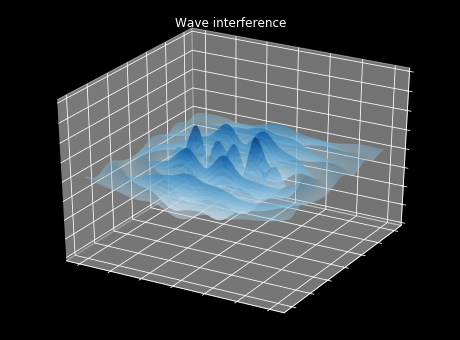

In [46]:

Nfrm = 480
fps = 60
    
# Create the plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot styling
plt.title("Wave interference")
plt.style.use('dark_background')

# Make the X, Y meshgrid.
xs = np.linspace(-60, 60, 125)
ys = np.linspace(-60, 60, 125)
X, Y = np.meshgrid(xs, ys)

# Set the z axis limits so they aren't recalculated each frame.
ax.set_zlim(-2, 2)


# Remove ticklabels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])



# Begin plotting.
surface = None
Z = generate(X, Y, 0, no_slits)

def update(idx):
    phi=phis[idx]
    global surface
    # If a line collection is already remove it before drawing.
    if surface:
        # ax.collections.remove(wframe)
        ax.collections.remove(surface)

    # Plot the new surface and pause briefly before continuing.
    Z = generate(X, Y, phi * .2, no_slits)
    surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='Blues', alpha=.5, edgecolor='none')
       
    
phis = np.linspace(0, 180. / np.pi, Nfrm)
ani = animation.FuncAnimation(fig, update, Nfrm, interval=2000/fps)
plt.show()

Finally, the following figure shows a histogram of the single photon counts at the screen for a cat state with  $\alpha = 3$ . This shows the same interference pattern as the position distribution plot in the cell above, but now with simulated particles collapsing at the screen. The operator used to collapse is the position operator  $\hat{x}$ , thus the x axis shows the position of the collapse on the screen. This histogram shows that we succesfully simulated a no measurement single electron double slit experiment.

/home/jaydew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


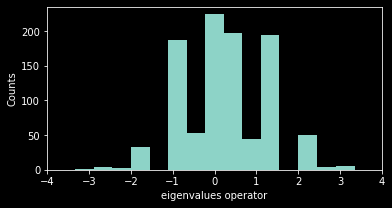

In [39]:
# Simulate a number of random collapses at the screen
collapses = 10000  # Amount of collapses
big_N = 1000       # Size of the larger Hilbert space
zoom = 4           # x-axis bounds
    
result_me = mesolve(H, cat, t, qeye(N))
rho = result_me.states[len(result_me.states) - 1]   # The last state is the state at the screen

# Transform to the basis of eigenstates of the x operator and collapse
eigvals, eigstates = x.eigenstates()
array = [collapse(rho, eigvals, eigstates) for i in range(1000)]

# Plot  the result
plt.figure(figsize=(6,3))
plt.xlim(-zoom, zoom)
plt.hist(array, bins=eigvals)
plt.ylabel(r"Counts")
plt.xlabel('eigenvalues operator')
plt.show()

### 5.2 The disruptive regime

In this subsection we will be looking at the effects of measuring different observables at the slit. We will attempt to answer the questions: How does measuring the position of the electrons at the double slit affect the interference pattern at the screen? What if instead of measuring the position  $\hat{x}$  we measured  $\hat{x}^2$ ?

The following cell shows a histogram of the single photon collapses at the screen, after their position was measured at the slits. We see that the interference pattern is completely gone, resulting in one big gaussian-like distribution of the electrons. This means that measuring through which slit the electron goes destroys the interference, and makes the electron behave like a classical particle instead of a quantum mechanical wave.



/home/jaydew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


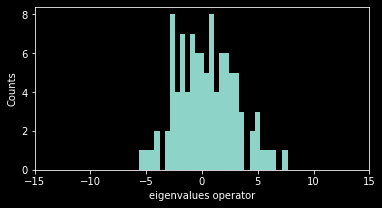

In [40]:
# Simulate a number of random collapses at the screen
collapses = 10000  # Amount of collapses
big_N = 1000       # Size of the larger Hilbert space
zoom = 15          # x-axis bounds

result_me = mesolve(H, cat, t, x)
rho = result_me.states[len(result_me.states) - 1]
eigvals, eigstates = x.eigenstates()
array = [collapse(rho, eigvals, eigstates) for i in range(100)]

# Plot  the result
plt.figure(figsize=(6,3))
plt.xlim(-zoom, zoom)
plt.hist(array, bins=eigvals)
plt.ylabel(r"Counts")
plt.xlabel('eigenvalues operator')
plt.show()

However, we get more interesting when we simulate a measurement of  $\hat{x}^2$  at the slits. It shows a histogram of the measurements at the screen where we simulated 100.00 individual photons. It appears that it conserves the interference pattern in the middle of the screen, but destroys it when you go too far off center.

/home/jaydew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


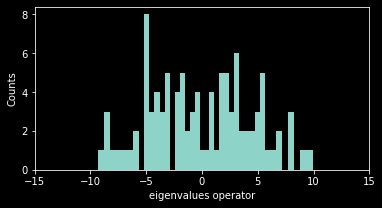

In [14]:
# Simulate a number of random collapses at the screen
collapses = 10000  # Amount of collapses
big_N = 1000       # Size of the larger Hilbert space
zoom = 15          # x-axis bounds

result_me = mesolve(H, cat, t, x**2)
rho = result_me.states[len(result_me.states) - 1]
eigvals, eigstates = x.eigenstates()
array = [collapse(rho, eigvals, eigstates) for i in range(100)]

# Plot  the result
plt.figure(figsize=(6,3))
plt.xlim(-zoom, zoom)
plt.hist(array, bins=eigvals)
plt.ylabel(r"Counts")
plt.xlabel('eigenvalues operator')
plt.show()

## 6. Summary and Outlook

To conclude, simulating diffraction grating is possible in QuTip by approximating the potential with a Harmonic one, as it is often doen in complex analytical calculations. As initially anticipated, Young's double slit experiment and its extension, the diffraction grating, adheres to the the observer effect: it is the disturbed by the act of observation. Making measurements of the position operator, $\hat{x}$, destroys the interference pattern and leaves us with only a Gaussian-like lumps. However, when measuring $\hat{x}^2$, we immediately notice an unexpected result: the interference pattern is focused on the center of the screen, but fades away quickly. We noted that the three of us were unable to explain this strange behaviour based on our previous knowledge. Despite this, we can safely conclude that measuring x^2 does not provide any conclusive of our original 'which path' problem, namely we do not know through which slit an photon passes.


We hope that we have motivated the reader to be curious about the interesing case of measuring $\hat{x}^2$, as we have done in experiment 5.2. Unfortunately, a lab study is most likely required to get a better insight into this. However, it also raises some other interesing questions: what if you try to measure p and $\hat{p}^2$? But even more interesing: what if you measure x and p simultansiously? The Copenhagen interpretation clearly tells us that such thing is impossible, and yet there might be a way to simulate it using QuTip, although the results will most likely be far from the real world results. 



